# Plotting with Seaborn

[Seaborn](https://seaborn.pydata.org/index.html) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

## Overview

  - [Installing Seaborn](https://seaborn.pydata.org/installing.html) and required dependencies (in case you haven't done it already)
  - Formatting data with Pandas (refreshing your memory)
  - Getting some [data](https://github.com/mwaskom/seaborn-data)
  - Layouts and figures
  - Let's plot!
 
### Pandas 

[Pandas](https://pandas.pydata.org/) is an open source library for data manipulation and analysis. 

In the following example we will import pandas, and [NumPy](http://www.numpy.org/) a scientific computing package.

In [60]:
#importing all modules

import pandas as pd
import numpy as np

#Making a dataframe of random numbers with 10 rows and 5 columns 

df = pd.DataFrame(np.random.randn(20,5))    
df

#Display the first five rows
df.head()

,0,1,2,3,4
0,0.390617,-0.579491,-1.036346,-0.007630,-0.886673
1,1.452601,0.508233,1.177929,1.207902,-1.094366
2,-0.763262,1.683583,0.057414,-1.013578,-0.724458
3,0.720844,-0.221549,-0.244832,-0.717054,0.979266
4,0.427572,-0.605938,-1.267491,-0.453266,-0.200847


### Use pandas to upload a file

Now let's read a file using pandas. 

In this case we will work with the [iris flower](https://en.wikipedia.org/wiki/Iris_flower_data_set) multivariate dataset from Ronald Fisher's paper from 1963.

In [61]:
#importing all modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Upload the iris file using pandas

df = pd.read_csv("~/URPP/Plotting_with_python/iris.csv")
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [62]:
#Overview of the data

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Let's start plotting!

# Comparing Matplotlib with Seaborn

## A simple histogram with matplotlib

We will use the dataframe from above and make a simple histogram with one of the column values. That way we can see the distribution of the values. Feel free to play with the columns plotted.


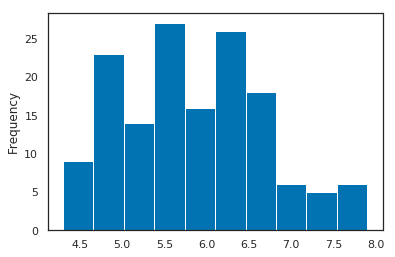

In [63]:
#Import all modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Display pandas histogram
df['sepal_length'].plot.hist()

#Plot the results
plt.show()


## Plotting distributions  

We will start by comparing the histograms made with **Matplotlib** and with **Seaborn**.  

The [seaborn distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot) function combines the matplotlib hist function (with automatic calculation of a good default bin size) with the seaborn [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html?highlight=kde#seaborn.kdeplot) and [rugplot()](https://seaborn.pydata.org/generated/seaborn.rugplot.html?highlight=rug#seaborn.rugplot) functions. 


It can also fit [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) distributions and plot the estimated PDF over the data.

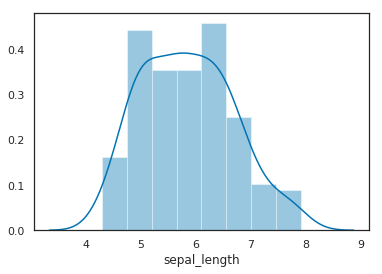

In [64]:
#Display a Seaborn distplot
sns.distplot(df['sepal_length'])

#Plot the results
plt.show()


We can customize this distribution plot in many ways, for example, by disabling the [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE) and customizing the number of bins:



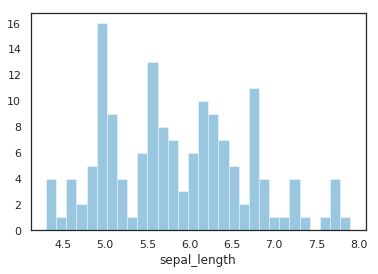

In [65]:
#Display a Seaborn distplot histogram without KDE
sns.distplot(df['sepal_length'],
            kde=False,
            bins=30)

#Plot the results
plt.show()


Or by plotting the kernel density estimate and a rug plot to the x axis:

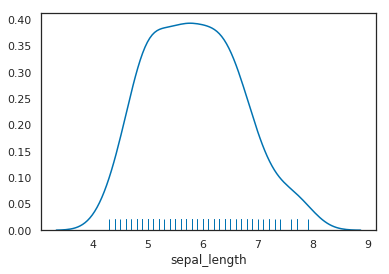

In [66]:
#Display a Seaborn distplot with kde and rug plots
sns.distplot(df['sepal_length'],
            rug=True,
            hist=False)


#Plot the results
plt.show()

Here, the data points are shown in the rug plot and the kernel density is the blue curve.


Now let's plot again the distribution with a histogram and maximum likelihood gaussian distribution fit using [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html):

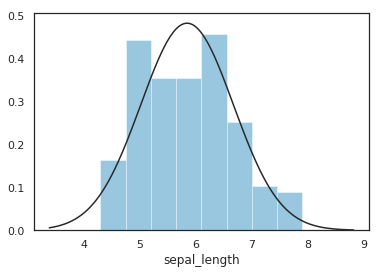

In [67]:
#Import norm from scipy.stats

from scipy.stats import norm

sns.distplot(df['sepal_length'],
             fit=norm,
             kde=False)

#Plot the results
plt.show()

There are many other customizations that can be used by passing **arguments** to the underlying function (eg: *kde_kws* label):

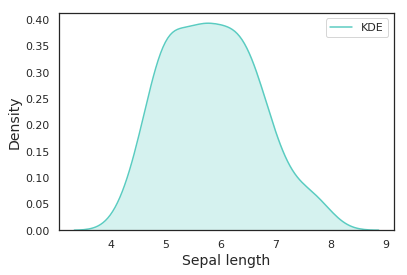

In [68]:
#Display a Seaborn distplot only with kde
#Customize the arguments of kde using kde_kws

sns.distplot(df['sepal_length'],
             kde_kws={'shade':True, 'color':'#5accc1', 'label':'KDE'},
             hist=False)

#Labeling the axes

plt.xlabel('Sepal length', fontsize=14)
plt.ylabel('Density', fontsize=14)

#Plot the results
plt.show()

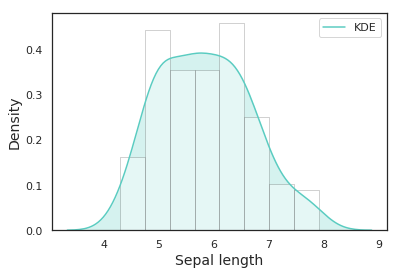

In [69]:
#Display a Seaborn distplot with kde and histogram customized

#Customize the arguments of kde using kde_kws

sns.distplot(df['sepal_length'],
             kde_kws={'shade':True, 'color':'#5accc1', 'label':'KDE'},
             hist_kws=dict(color='w', edgecolor='k', linewidth=0.5))

#Labeling the axes

plt.xlabel('Sepal length', fontsize=14)
plt.ylabel('Density', fontsize=14)

#Plot the results
plt.show()

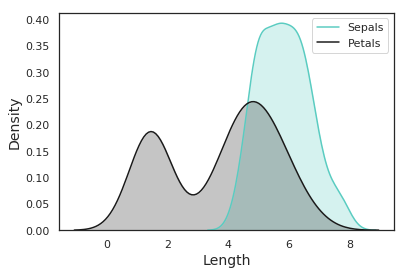

In [70]:
#Display a Seaborn distplot with kde for both sepals and petals length
#Customize the arguments of kde using kde_kws

sepal = sns.distplot(df['sepal_length'],
                     kde_kws={'shade':True, 'color':'#5accc1', 'label':'Sepals'},
                     hist=False)
petal = sns.distplot(df['petal_length'],
                     kde_kws={'shade':True, 'color':'k', 'label':'Petals'},
                     hist=False)

#Labeling the axes

plt.xlabel('Length', fontsize=14)
plt.ylabel('Density', fontsize=14)

#plt.xlim([3, 9])

#Plot the results
plt.show()

### Exercise 1:

- Make a histogram with the sepal_length and petal_length of the iris flower. (*Hint: use the **sns.distplot()** function*)
- Use bins of 30 and 50 respectively.
- Remove the KDE (Hint: set to **False**)
- Label the X and Y axis with **Length** and **Flowers** respectively.
- Optional: Play with the colours and the labels using [hist_kws](https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=hist_kws).


sepal = sns.____(df['sepal_length'],
                 kde=____,
                 bins=____,
                                        

petal = sns.____(df['petal_length'],
                 kde=____,
                 bins=____,
                    
#Labeling the axes

plt.xlabel('____', fontsize=14)
plt.ylabel('____', fontsize=14)

#Plot the results
plt.show()

## Linear regression


In contrast with the previous distribution plots which are useful to compare one variable (univariate), linear regression plots are useful when analyzing the **relationship between two variables** (bivariate)

In Seaborn, this function is called [regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) and it is used very similarly than the distribution function, however, both variables (x,y) have to be defined. Similarly, you can also use [lmplots](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplots) which despite being very similar are much more flexible.

### Regplots (low level)
Less flexible than the lmplots, however still quite useful to show a quick regression analysis:

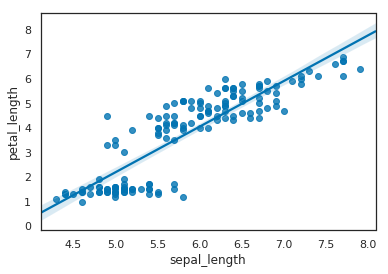

In [71]:

fig = sns.regplot(x="sepal_length",
                  y="petal_length",
                  data=df) 


### Lmplots (high level)

These plots use the same base function of regplot, however they are **much more powerful** because they allow you to organize the data by **colors**(*hue*) and **columns**(*col*) or **rows**(*row*) by facetting:


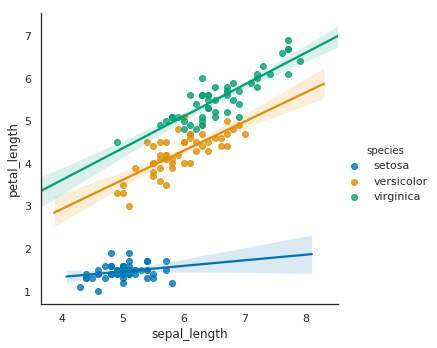

In [72]:
fig = sns.lmplot(x="sepal_length",
                  y="petal_length",
                  data=df,
                 hue="species") 

### Exercise 2: 

Substitute *hue* first by rows(*row*) and second by columns(*col*) and see what happens.

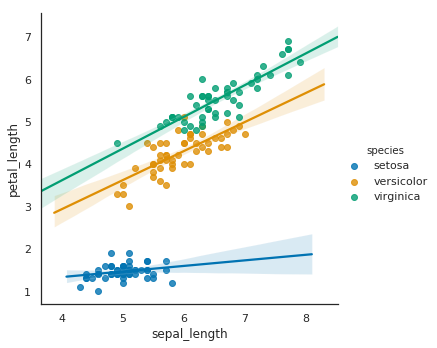

In [73]:
fig = sns.lmplot(x="sepal_length",
                  y="petal_length",
                  data=df,
                 hue="species") 

## Setting Seaborn Styles

You can set aesthetic parameters in one step by using [sns.set()](https://seaborn.pydata.org/generated/seaborn.set.html?highlight=set#seaborn.set). 

In the following example we will see the default style of Seaborn, with a grey grid and muted colors. This default style of Seaborn is called **darkgrid**.


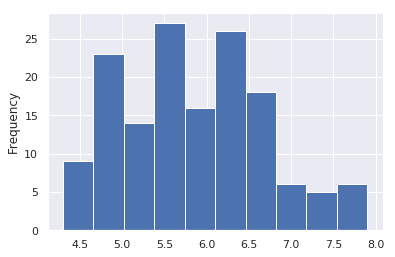

In [74]:
sns.set()

fig = df['sepal_length'].plot.hist()

plt.show()


With Seaborn styles you can control the color palette, the use of grid and tick marks. All depending on what message you want to convey.

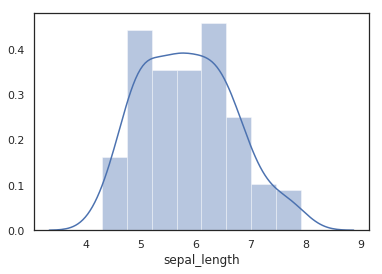

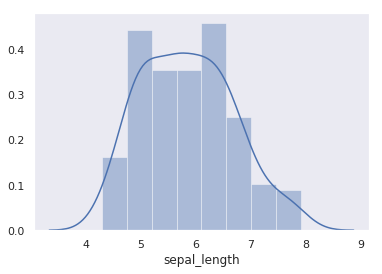

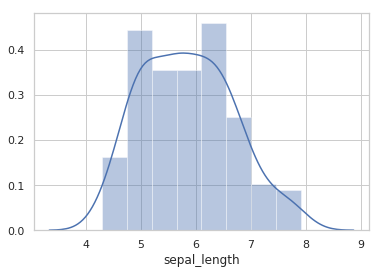

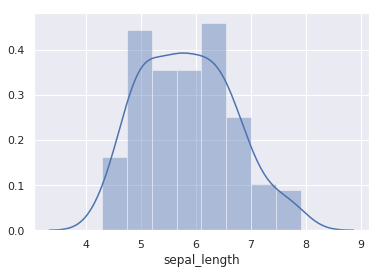

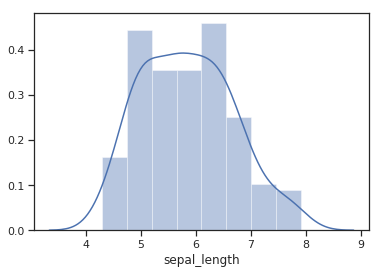

In [75]:
for style in ['white', 'dark', 'whitegrid', 'darkgrid', 'ticks']:
    sns.set_style(style)
    sns.distplot(df['sepal_length'])
    plt.show()

It is useful to experiment with different styles and use the one that **displays the message you want to convey best.**

Sometimes **removing elements** in a plot helps making the message clearer. 

Seaborn has different functions to remove elements of a plot easily like [sns.despine()](https://seaborn.pydata.org/generated/seaborn.despine.html), a function that can remove the axis of the plot by passing an argument to do so. Some people might find this useful.

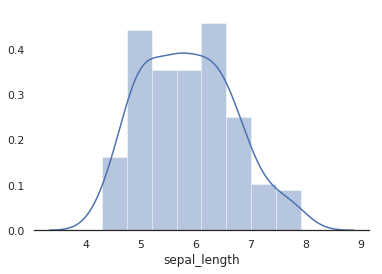

In [76]:
#set seaborn style to 'white'

sns.set_style('white')

#display distribution plot using the sepal_length variable
sns.distplot(df['sepal_length'])

#remove the Y axis
sns.despine(left=True)


### Exercise 3:

Create a linear regression plot by: 

- Setting the style of the plot to 'whitegrid' using **sns.set_style()**
- The **sns.lmplot()** function
- 'sepal_length' as the *x* variable and 'petal_length' as the *y* variable
- Remove the *x* axis using sns.despine()



#Set the style to whitegrid using set_style()
sns.____('____')

#Create regression plot using lmplot()
fig = sns.____(x="____",
               y="____",
               data=df,
               hue="species")

#Remove X axis using despine()
sns.____(____)
plt.show()

## Colors in Seaborn

Colors can be very useful to convey a message.

There are several things to take into consideration when choosing color palettes, like printing and color blind people. Fortunately, there are specific color palettes for this kind of issue or combinations to avoid accordingly.

Seaborn supports matplotlib color codes:


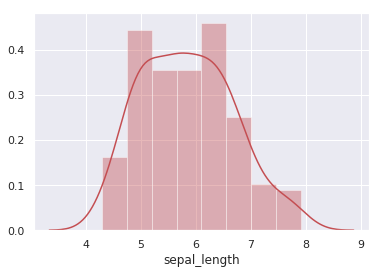

In [77]:
#Setting matplotlib colors and default darkgrid
sns.set(color_codes=True)

#Making a distribution plot with its KDE, red color
sns.distplot(df['sepal_length'], 
             color='r')
#Display plot
plt.show()

### Palettes

Seaborn uses the [set.palette()](https://seaborn.pydata.org/tutorial/color_palettes.html) function to define a palette which makes less tedious the process of having to assign a colour for each variable. 

There are six default palettes in Seaborn: ***deep, muted, pastel, bright, dark and colorblind***
   
    

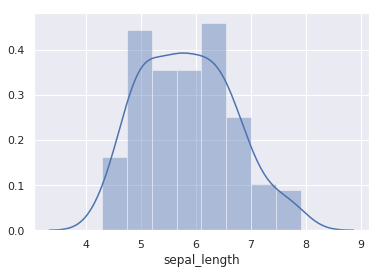

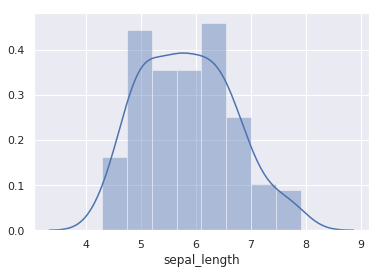

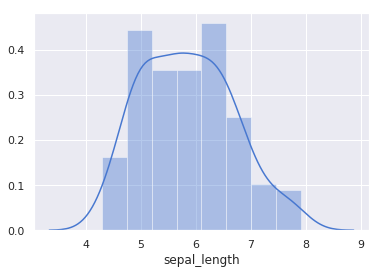

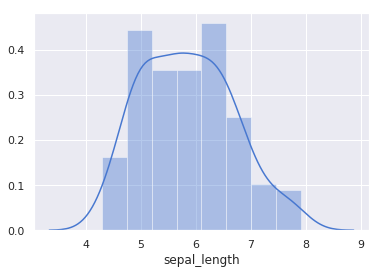

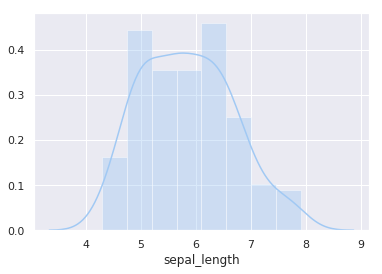

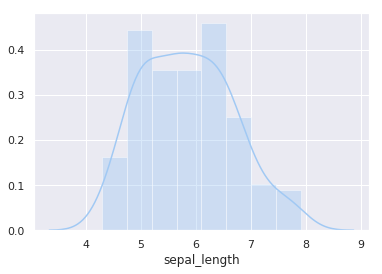

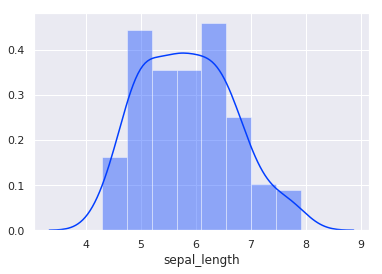

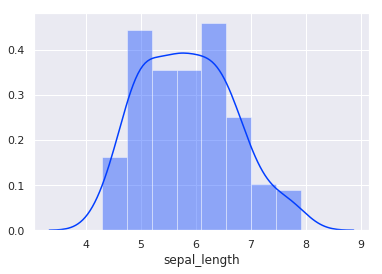

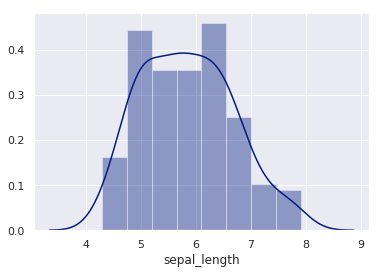

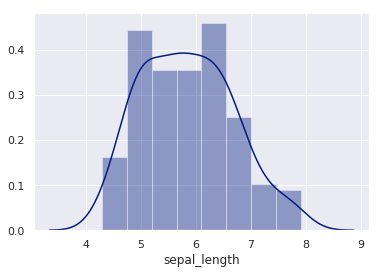

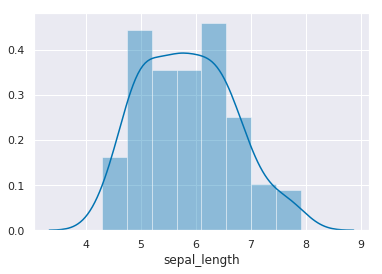

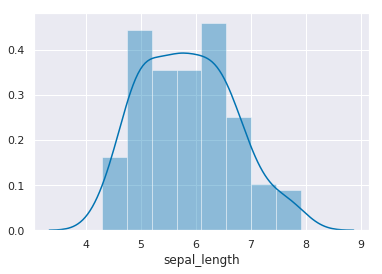

In [78]:
# Calling all default palettes using SEABORN_PALETTES dictionary 
# and making distribution plots for each category 
for p in sns.palettes.SEABORN_PALETTES:
    sns.set_palette(p)
    sns.distplot(df['sepal_length'])
    plt.show()
    plt.clf

## Displaying palettes 

The sns.palplot() function displays a seaborn palette, and the sns.color_palette() function returns the current palette.



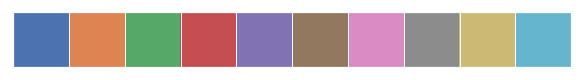

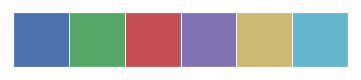

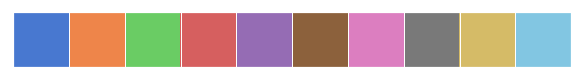

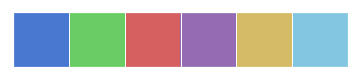

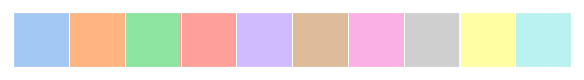

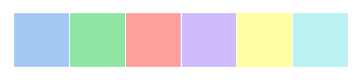

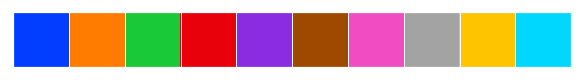

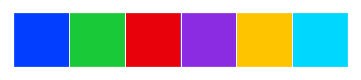

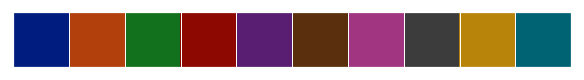

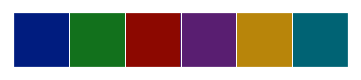

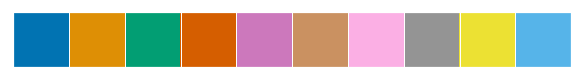

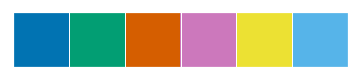

In [79]:
for p in sns.palettes.SEABORN_PALETTES:
    sns.set_palette(p)
    sns.palplot(sns.color_palette())
    plt.show()

There are three main types of color palettes:

### 1) Circular colours

Useful when the data is arbitrary and not ordered. This color system is good when no particular variable should be emphasized.



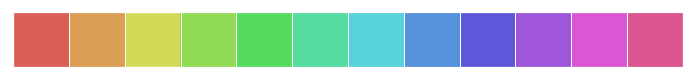

In [80]:
sns.palplot(sns.color_palette("hls",12)) # Random colors

### 2) Sequential colours

Are useful when the data has a consistent rage from high to low.

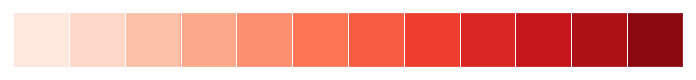

In [81]:
sns.palplot(sns.color_palette("Reds",12))

### 3) Diverging colours

Are good when both the low and high values are relevant.

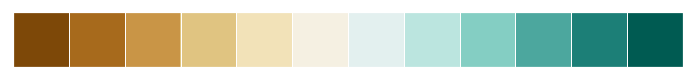

In [82]:
sns.palplot(sns.color_palette("BrBG",12))

### Extra palette: Categorical brewer colours

This is a cathegorical aesthetically pleasant colour palette and comes from the [Color Brewer](http://colorbrewer2.org/#type=sequential&scheme=Blues&n=3) tool. It has sequential, divergent and circular colors and it is very convenient.


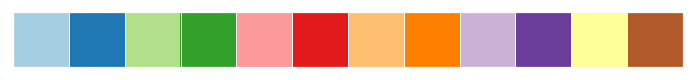

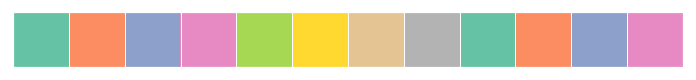

In [83]:
sns.palplot(sns.color_palette("Paired",12)) #Categorized 
sns.palplot(sns.color_palette("Set2", 12)) # Circular

### Custom palettes

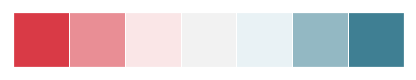

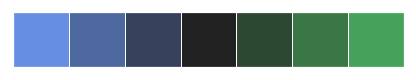

In [84]:
#Diverging custom palette
sns.palplot(sns.diverging_palette(10, 220, sep=80, n=7)) 

#Diverging palette with dark midpoint
sns.palplot(sns.diverging_palette(255, 133, l=60, n=7, center="dark")) 

## Enough about palettes!

Let's see some examples of what can be done:




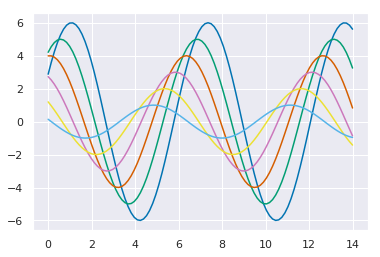

In [85]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
        sns.set_palette("coolwarm")
sinplot()

The [color_palette()](https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette) function can also be used in a **with** statement to temporarily change the color palette:
    

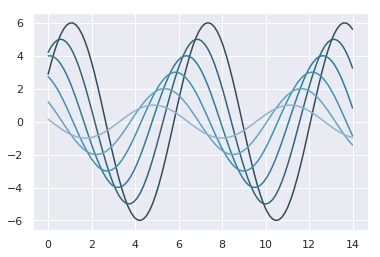

In [86]:
with sns.color_palette("PuBuGn_d"):
    sinplot()

### Generate a colormap object:


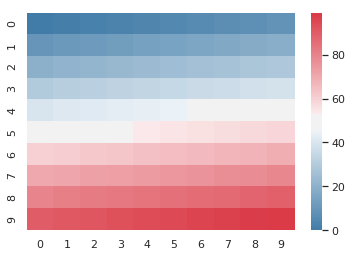

In [87]:

from numpy import arange
x = arange(100).reshape(10, 10)
cmap = sns.diverging_palette(240, 10, sep=20, as_cmap=True)
ax = sns.heatmap(x, cmap=cmap)

### Exercise 4:

Set style, enable color code and create a purple displot with the ***sepal_length*** variable and the color 'purple'

#Set style, enable color code, and create a purple distplot
sns.___(color_codes=____)
sns.distplot(df['________'], color='____')

#Show the plot
plt.____()

### Exercise 5:

- Create a for loop to show the differences between the bright and colorblind palette.
- Set the palette using the set_palette() function.
- Use a distplot of the sepal_length column.

#Loop through differences between bright and colorblind palettes
for p in ['___', '___']:
    sns.___(p)
    sns.___(df['sepal_length'])
    plt.show()

### Exercise 6:

Create a palette! 
- Use the *sns.palplot()* function 
- Color ***Greens***.
- **12** colors.

#Create the coolwarm palette

sns.____(sns.color_palette("____", ____))
plt.show()

## Customization using Matplotlib

Seaborn plots can be customized using matplotlib, (e.g. the axes, limits, lines, etc.) 



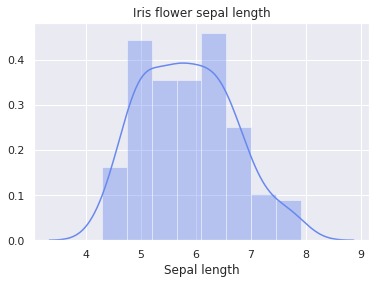

In [88]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the distribution of the sepal length
sns.distplot(df['sepal_length'], ax=ax)

# Modify the annotations of the plot
ax.set(xlabel="Sepal length",
       title="Iris flower sepal length")

# Display the plot
plt.show()

## Exercise

With all you have learned generate a distribution plot using adding annotations:

- Create figure and axes
- Plot the sepal_length column distrubution using **sns.distplot()**
- Add a vertical line for the **median** and the **mean**
- Set xlabel to **Petal length(cm)** and name the plot "Iris flower petal length"
- Show the legend
- If you are feeling like it play with the colors and background (optional). 
- You can also remove the histogram and leave only the KDE



#Generate a figure and axes. Then plot the data

fig, ax = plt.subplots() #setting the style to white background

fig = sns.____(df['petal_length'], ax=____, hist=True) # create figure and axes

mean = np.mean(df['petal_length'], axis=0)
median = np.median(df['petal_length'], axis=0)

#Customize the labels and limits
ax.set(xlabel="____", title="____")

#Add vertical lines for the median and mean
ax.axvline(x=____, color='r', label='Median', linestyle='--', linewidth=2)
ax.axvline(x=____, color='b', label='Mean', linestyle='-', linewidth=2)

#Show the legend and plot the data
ax.____()
plt.show()

## Example of subpplots and densities together:

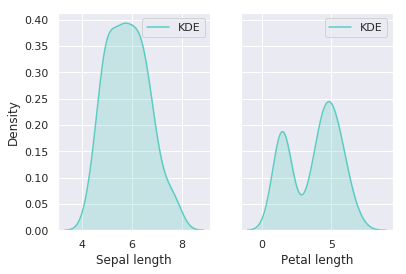

In [89]:
# Create a plot with 1 row and 2 columns that share the y axis label
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True)

# Plot the distribution of the sepal length on ax0
sns.distplot(df['sepal_length'], ax=ax0, hist=False, kde_kws={'shade':True, 'color':'#5accc1', 'label':'KDE'},)
ax0.set(xlabel="Sepal length", ylabel="Density")

# Plot the distribution of petal length on ax1
sns.distplot(df['petal_length'], ax=ax1, hist=False, kde_kws={'shade':True, 'color':'#5accc1', 'label':'KDE'},)
ax1.set(xlabel="Petal length")

# Display the plot
plt.show()

We have hopefully reached the end of this tutorial.

Next there are some examples --still using the iris dataset-- of some plots that can be done with Seaborn.

Of course, there is much more, but this is just an introduction.

For more on [aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial).

# Examples of other plot types with Seaborn


## Exploring the data with sns.pairplot()


Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column.

For more on [sns.pairplot()](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

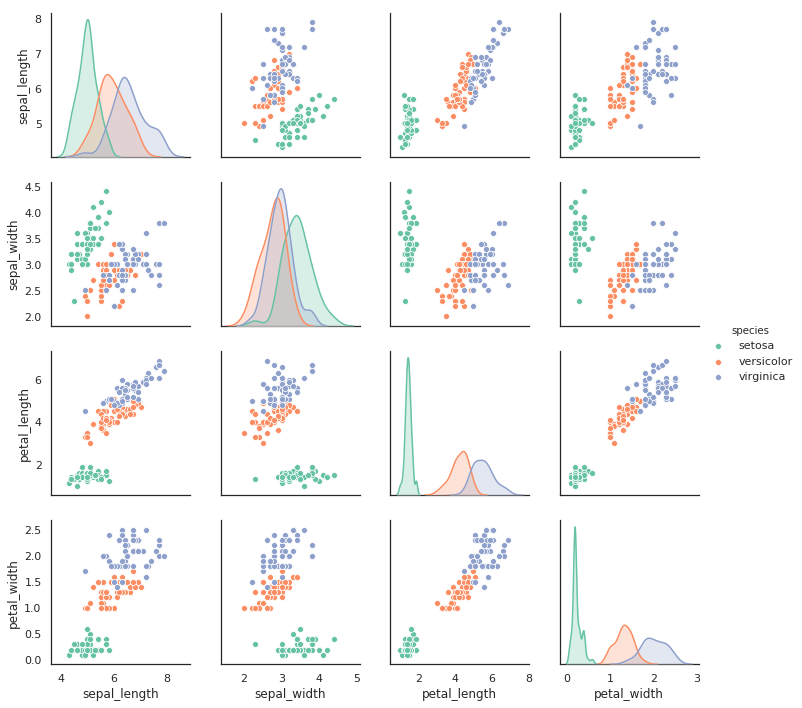

In [90]:
import seaborn as sns
import pandas as pd

sns.set(style="white", palette = 'Set2')

# Load the example iris dataset
df = pd.read_csv("/home/cbello/URPP/Plotting_with_python/iris.csv")

sns.pairplot(df, hue = "species");

## Paired density and scatter plot matrix

Subplot grid for plotting pairwise relationships in a dataset.

This class maps each variable in a dataset onto a column and row in a grid of multiple axes. Different axes-level plotting functions can be used to draw bivariate plots in the upper and lower triangles, and the the marginal distribution of each variable can be shown on the diagonal.

You can customize the plot grid using the [PairGrid()](https://seaborn.pydata.org/generated/seaborn.PairGrid.html) function

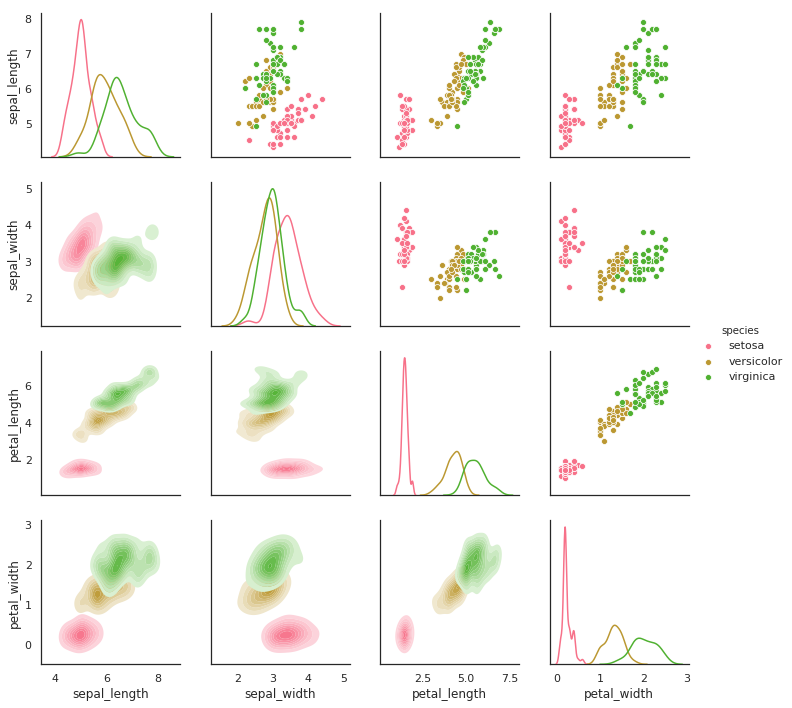

In [91]:
import seaborn as sns
sns.set(style="white", palette='husl')

df = sns.load_dataset("iris")

g = sns.PairGrid(df, diag_sharey=False, hue="species")
g.map_lower(sns.kdeplot, bw=0.2, antialiased=True, shade=True, shade_lowest=False)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=1.5);
g = g.add_legend()


## Correlation Heatmap

Plot rectangular data as a color-encoded matrix.

For more [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

[]

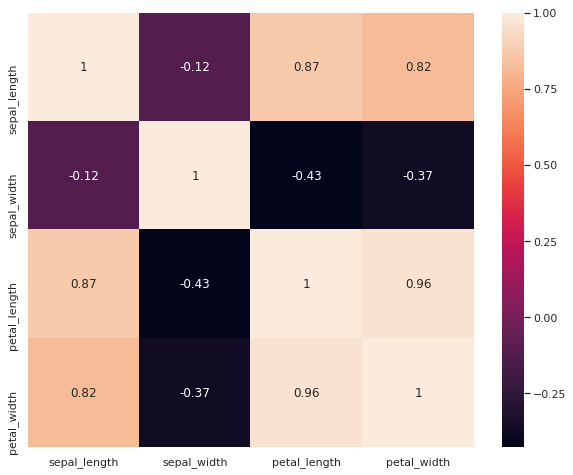

In [92]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)#5accc1
plt.plot()

## Swarmplot


Draw a categorical scatterplot with non-overlapping points.

For more [here](https://seaborn.pydata.org/generated/seaborn.swarmplot.html?highlight=swarmplot#seaborn.swarmplot)

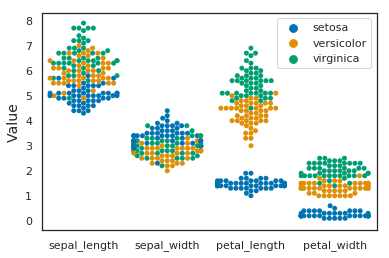

In [93]:
import seaborn as sns
import pandas as pd

sns.set(style="white", palette="colorblind")

# Load the example iris dataset
iris = pd.read_csv("~/URPP/Plotting_with_python/iris.csv")

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(iris, "species", var_name="measurement")

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="measurement", y="value", hue="species", data=iris) #swarmplot
plt.xlabel('', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend();


## Violinplot

Draw a combination of boxplot and kernel density estimate.

A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

For more [here](https://seaborn.pydata.org/generated/seaborn.violinplot.html)


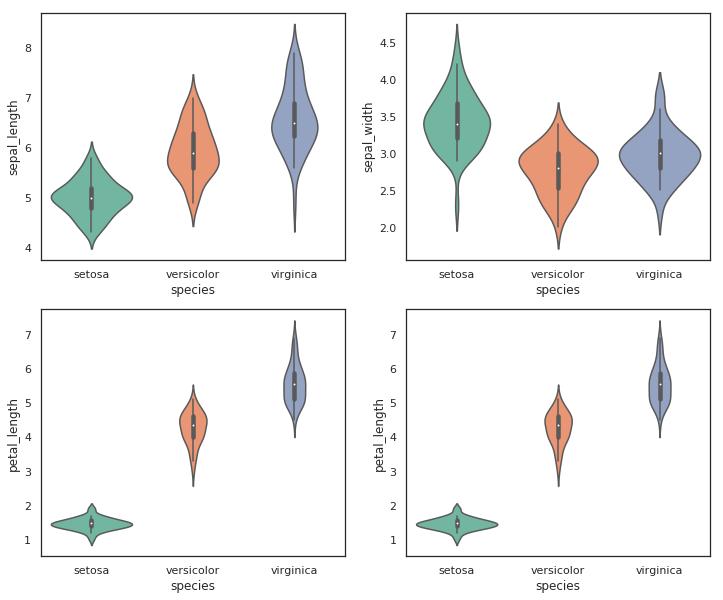

In [94]:
#importing libraries
import seaborn as sns
import pandas as pd

#setting style and palette
sns.set(style="white", palette="Set2")

# Load the example iris dataset
df = pd.read_csv("~/URPP/Plotting_with_python/iris.csv")

#Figure size
plt.figure(figsize=(12,10))

#making subplots, 2 columns, 2 rows, 1st axis
plt.subplot(2,2,1)
sns.violinplot(x='species',y='sepal_length',data=df)

#making subplots, 2 columns, 2 rows, 2nd axis
plt.subplot(2,2,2)
sns.violinplot(x='species',y='sepal_width',data=df)

#making subplots, 2 columns, 2 rows, 3rd axis
plt.subplot(2,2,3)
sns.violinplot(x='species',y='petal_length',data=df)

#making subplots, 2 columns, 2 rows, 4th axis
plt.subplot(2,2,4)
sns.violinplot(x='species',y='petal_length',data=df);

## Jointplots

Draw a plot of two variables with bivariate and univariate graphs.

More infor on [sns.joinplot()](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

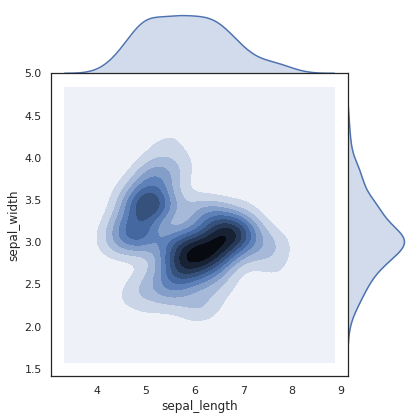

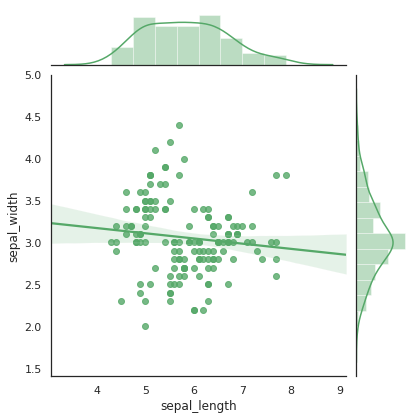

In [95]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the example iris dataset
df = pd.read_csv("~/URPP/Plotting_with_python/iris.csv")

sns.set(style="white")

sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='kde', color="b", space=0)
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='reg', color="g")

plt.show()

## 3D Principal component analysis (PCA)


<Figure size 480x480 with 0 Axes>

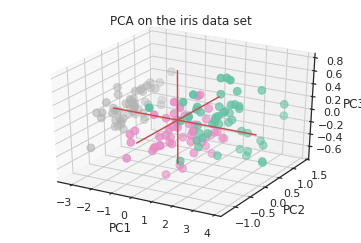

In [96]:
#Code from the Python graph gallery: https://python-graph-gallery.com/372-3d-pca-result/
# import all libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Set style and get the iris dataset
import seaborn as sns
sns.set_style("white")

df = pd.read_csv("~/URPP/Plotting_with_python/iris.csv")

my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Keep the 'specie' column appart + make it numeric for coloring
df['species']=pd.Categorical(df['species'])
my_color=df['species'].cat.codes
df = df.drop('species', 1)

# Run The PCA
pca = PCA(n_components=3)
pca.fit(df)
 
# Store results of PCA in a data frame
result=pd.DataFrame(pca.transform(df), columns=['PCA%i' % i for i in range(3)], index=df.index)

# Plot initialisation
Axes3D = Axes3D  # pycharm auto import
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color, cmap="Set2_r", s=60)

# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the iris data set")

#plt.show()
plt.show();

There are many more posibilities! Please check [Seaborn's official webpage](https://seaborn.pydata.org) for more. 

